In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import time
from tabulate import tabulate

%matplotlib inline
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('rainbow')



In [20]:
pwd()

'C:\\Users\\abi20'

In [23]:
data = pd.read_csv('C:\\Users\\abi20\\HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
temp=[]
for i in data.columns:
    temp.append([i,data[i].isnull().mean()])
print(tabulate(temp,headers=['Feature','% of null values']))

Feature                  % of null values
---------------------  ------------------
satisfaction_level                      0
last_evaluation                         0
number_project                          0
average_montly_hours                    0
time_spend_company                      0
Work_accident                           0
left                                    0
promotion_last_5years                   0
Department                              0
salary                                  0


In [11]:
temp=[]
for i in data.columns:
    temp.append([i,data[i].unique().size])
print(tabulate(temp,headers=['Feature','Unique Values']))
temp = np.nan

Feature                  Unique Values
---------------------  ---------------
satisfaction_level                  92
last_evaluation                     65
number_project                       6
average_montly_hours               215
time_spend_company                   8
Work_accident                        2
left                                 2
promotion_last_5years                2
Department                          10
salary                               3


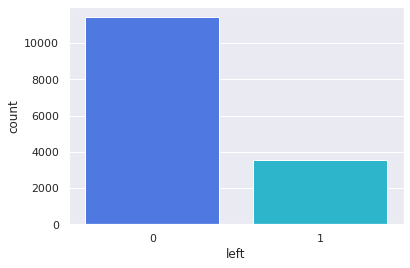

In [12]:
sns.countplot(data['left'])

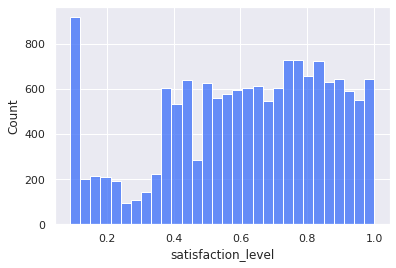

In [13]:
sns.histplot(x=data['satisfaction_level'])

In [14]:
data['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

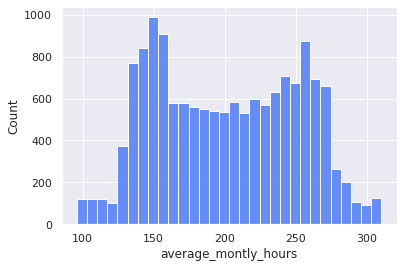

In [15]:
sns.histplot(x=data['average_montly_hours'])

In [16]:
data['average_montly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

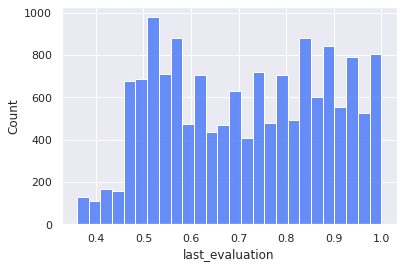

In [17]:
sns.histplot(x=data['last_evaluation'])

In [18]:
data['last_evaluation'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

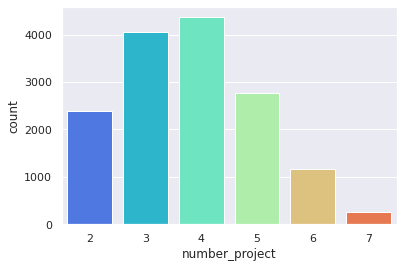

In [19]:
sns.countplot(x=data['number_project'])

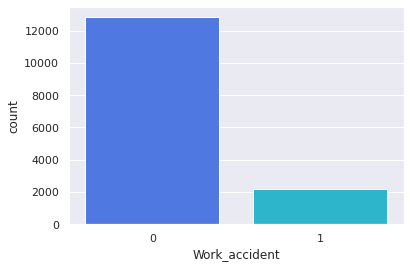

In [20]:
sns.countplot(x=data['Work_accident'])

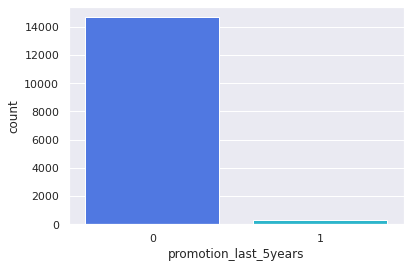

In [21]:
sns.countplot(x=data['promotion_last_5years'])

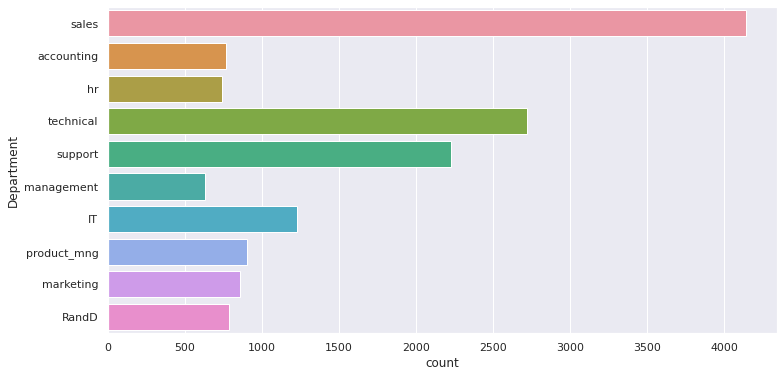

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(y=data['Department'],orient='v')

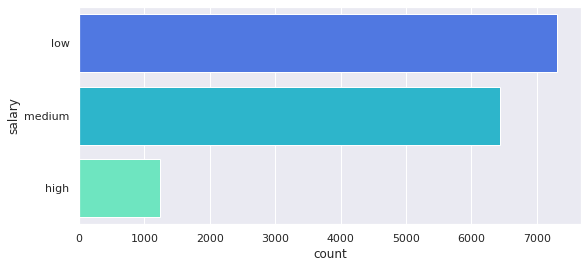

In [23]:
plt.figure(figsize=(9,4))
sns.countplot(y=data['salary'],orient='v')

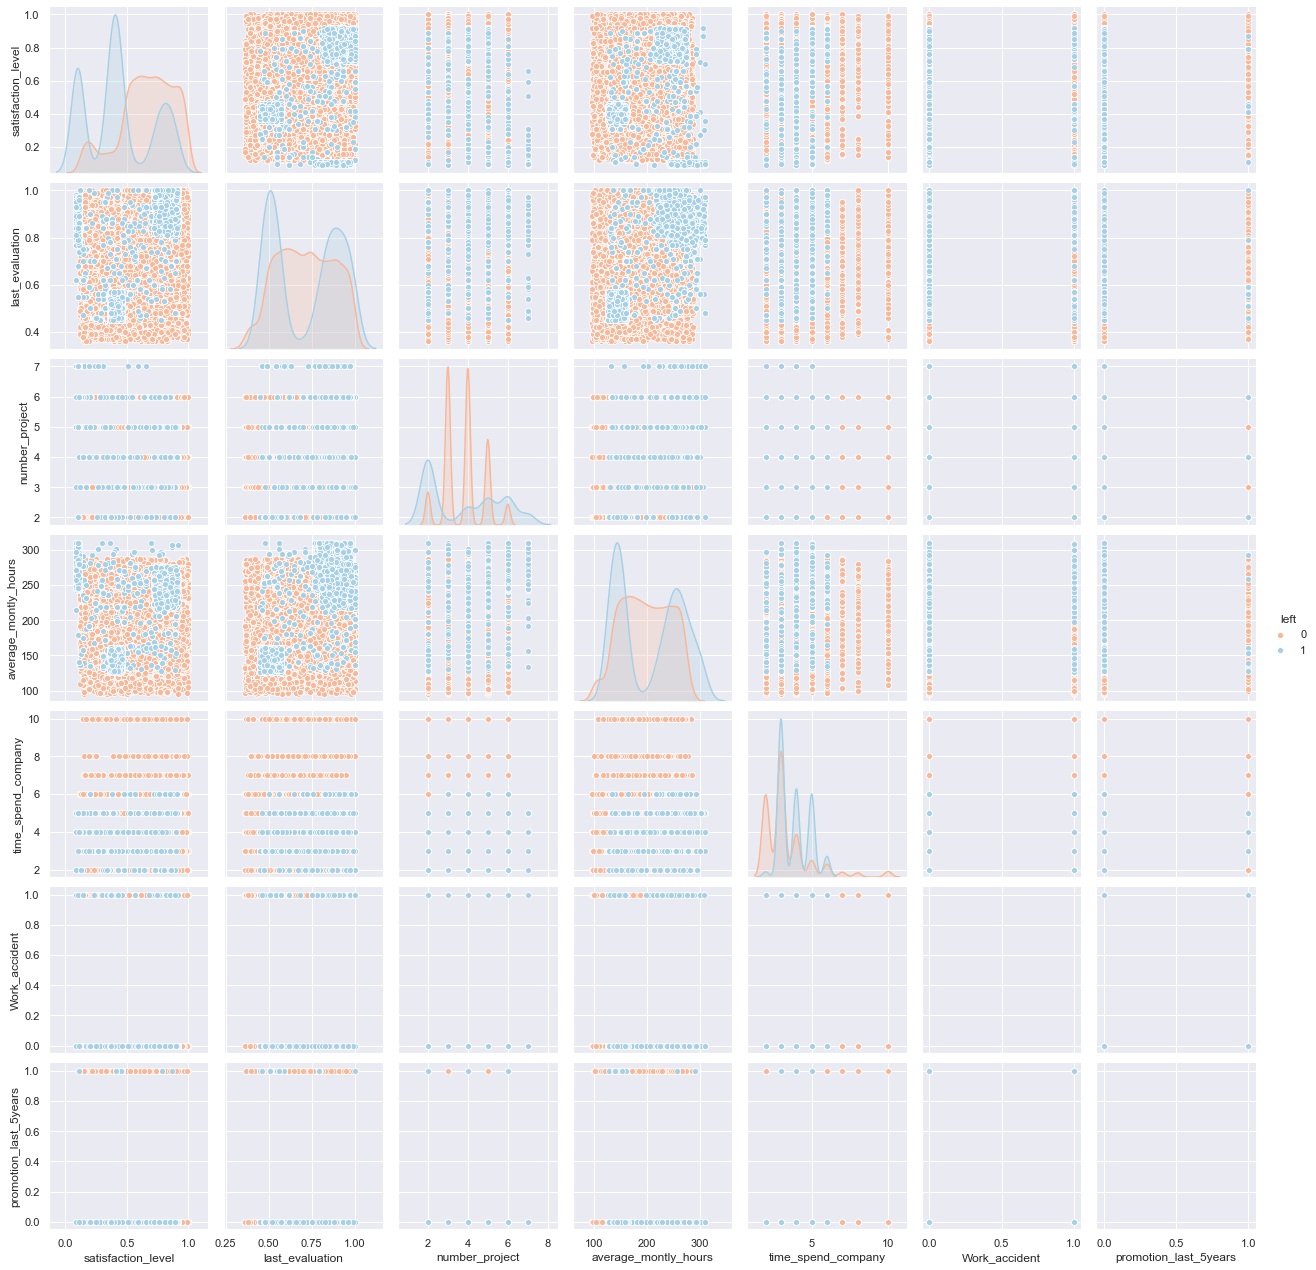

In [25]:
sns.pairplot(data,hue='left',palette='RdBu')

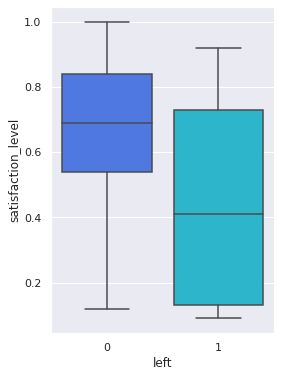

In [25]:
plt.figure(figsize=(4,6))
sns.boxplot(data=data,y='satisfaction_level',x='left')

In [26]:
data.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

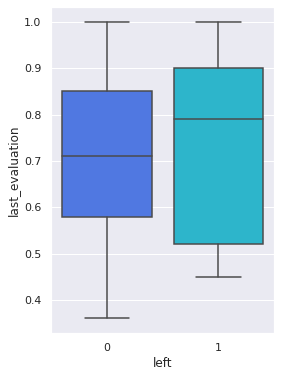

In [27]:
plt.figure(figsize=(4,6))
sns.boxplot(data=data,y='last_evaluation',x='left')

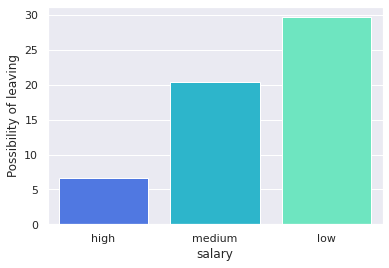

In [28]:
sns.barplot(data = pd.DataFrame(data.groupby('salary').mean()['left']*100).reset_index().sort_values(by='left').rename({'left':'Possibility of leaving'},axis=1),
           x='salary',
           y='Possibility of leaving')

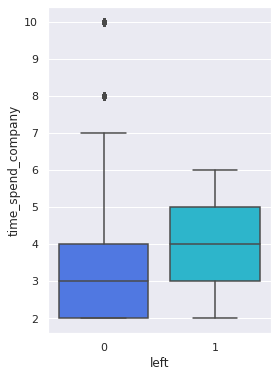

In [29]:
plt.figure(figsize=(4,6))
sns.boxplot(data=data,y='time_spend_company',x='left')

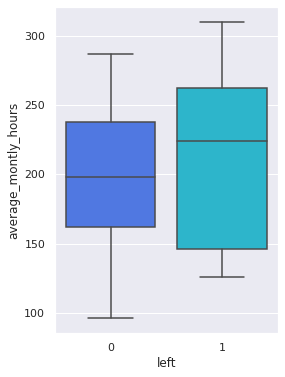

In [30]:
plt.figure(figsize=(4,6))
sns.boxplot(data=data,y='average_montly_hours',x='left')

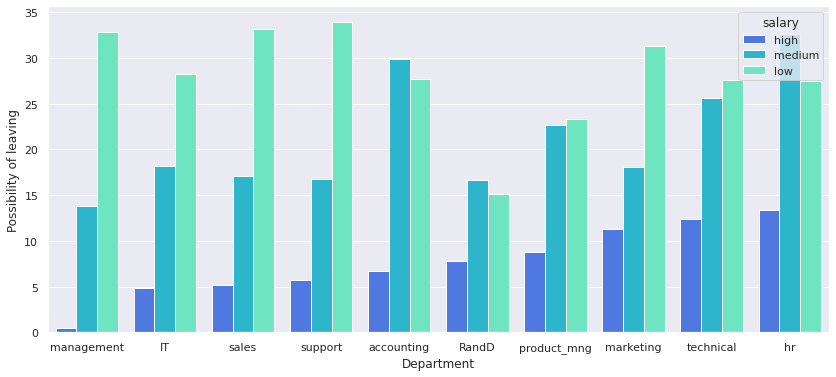

In [31]:
plt.figure(figsize=(14,6))
sns.barplot(data = pd.DataFrame(data.groupby(['Department','salary']).mean()['left']*100).reset_index().sort_values(by='left').rename({'left':'Possibility of leaving'},axis=1),
           x='Department',
           y='Possibility of leaving',
           hue='salary')

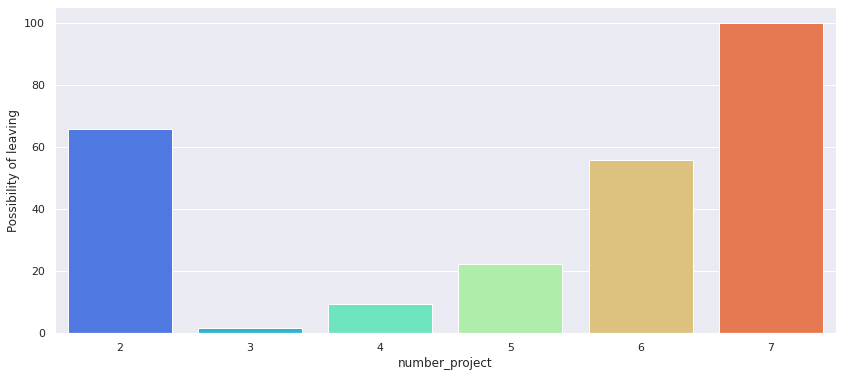

In [32]:
plt.figure(figsize=(14,6))
sns.barplot(data = pd.DataFrame(data.groupby(['number_project']).mean()['left']*100).reset_index().sort_values(by='left').rename({'left':'Possibility of leaving'},axis=1),
           x='number_project',
           y='Possibility of leaving')

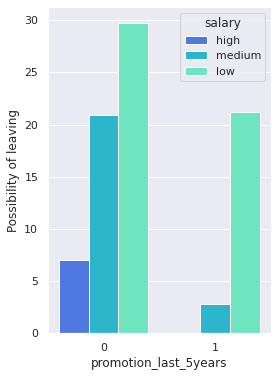

In [33]:
plt.figure(figsize=(4,6))
sns.barplot(data = pd.DataFrame(data.groupby(['promotion_last_5years','salary']).mean()['left']*100).reset_index().sort_values(by='left').rename({'left':'Possibility of leaving'},axis=1),
           x='promotion_last_5years',
           y='Possibility of leaving',
           hue='salary')

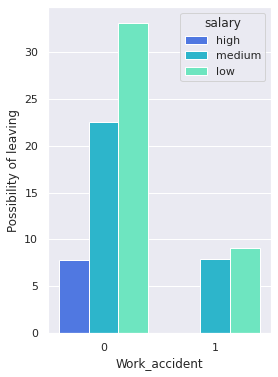

In [34]:
plt.figure(figsize=(4,6))
sns.barplot(data = pd.DataFrame(data.groupby(['Work_accident','salary']).mean()['left']*100).reset_index().sort_values(by='left').rename({'left':'Possibility of leaving'},axis=1),
           x='Work_accident',
           y='Possibility of leaving',
           hue='salary')

In [35]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dfs = []
for i in ['Department','salary']:
    temp = pd.DataFrame({'Before Encoding':data[i].unique(),'After Encoding':label_encoder.fit_transform(data[i].unique())})
    dfs.append([temp.sort_values(by=['After Encoding']),i])
    data[i] = label_encoder.fit_transform(data[i])
for i in dfs:
    print(i[1])
    display(i[0])
    print('\n')

Department


,Before Encoding,After Encoding
6,IT,0
9,RandD,1
1,accounting,2
2,hr,3
5,management,4
8,marketing,5
7,product_mng,6
0,sales,7
4,support,8
3,technical,9




salary


,Before Encoding,After Encoding
2,high,0
0,low,1
1,medium,2


In [37]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
classifier=[]
imported_as=[]

#LGBM
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
classifier.append('LGBM classifier')
imported_as.append('lgbm')

#MultiLayerPerceptron
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
classifier.append('Multi Layer Perceptron')
imported_as.append('mlp')

#Bagging
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
classifier.append('Bagging')
imported_as.append('bc')

#GBC
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
classifier.append('Gradient Boosting')
imported_as.append('gbc')

#ADA
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
classifier.append('Ada Boost')
imported_as.append('ada')

#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier() 
classifier.append('XG Boost')
imported_as.append('xgb')

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='sag')
classifier.append('Logistic Regression')
imported_as.append('lr')

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')

#SVM
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')

#Grid
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
classifier.append('SVM tuning grid')
imported_as.append('grid')

#STcaking
from sklearn.ensemble import StackingClassifier
estimators=[('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
            ('svr',SVC(random_state=42))]
stc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
classifier.append('Stacked (RFR & SVM)')
imported_as.append('stc')

classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')

All Models Imported
Models stored in dataframe called classifiers


In [38]:
class Modelling:
    def __init__(self, X_train, Y_train, X_test, Y_test, models):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.models = models
    
    def fit(self):
        model_acc = []
        model_time= []
        for i in self.models:
            start=time.time()
            if i == 'knn':
                accuracy = []
                for j in range(1,200):    
                    kn = KNeighborsClassifier(n_neighbors=j)
                    kn.fit(self.X_train,self.Y_train)
                    predK = kn.predict(self.X_test)
                    accuracy.append([accuracy_score(self.Y_test,predK),j])
                temp = accuracy[0]
                for m in accuracy:
                    if temp[0] < m[0]:
                        temp=m
                i = KNeighborsClassifier(n_neighbors=temp[1])
            i.fit(self.X_train,self.Y_train)
            model_acc.append(accuracy_score(self.Y_test,i.predict(self.X_test)))
            stop=time.time()
            model_time.append((stop-start))
            print(i,'has been fit')
        self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,'Runtime (s)':model_time})
        
    def results(self):
        models=self.models_output
        models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        self.best = models['Models'][0]
        models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
        models['Accuracy']=models['Accuracy'].round(5)*100
        self.models_output_cleaned=models
        return(models)
        
    def best_model(self,type):
        if type=='model':
            return(self.best)
        elif type=='name':
            return(self.models_output_cleaned['Models'][0])
    
    def best_model_accuracy(self):
        return(self.models_output_cleaned['Accuracy'][0])
    
    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0],3))
    
    def best_model_predict(self,X_test):
        return(self.best.predict(X_test))
    
    def best_model_clmatrix(self):
        return(classification_report(self.Y_test,self.best.predict(self.X_test)))
    
    def confusion_matrix(self):
        return(confusion_matrix(self.Y_test, self.best.predict(self.X_test)))

In [39]:
X = data.drop('left',axis=1)
Y = data['left']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=100)
classifiers

,Classifier,Imported as
0,LGBM classifier,lgbm
1,Multi Layer Perceptron,mlp
2,Bagging,bc
3,Gradient Boosting,gbc
4,Ada Boost,ada
5,XG Boost,xgb
6,Logistic Regression,lr
7,Random Forest,rfc
8,k Nearest Neighbours,knn
9,Support Vector Machine,svc


In [41]:
models_to_test = [lr,bc,gbc,ada,xgb,rfc,knn,lgbm]
classification = Modelling(X_train,Y_train,X_test,Y_test,models_to_test)
classification.fit()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False) has been fit
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False) has been fit
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                

In [42]:
classification.results()

,Models,Accuracy,Runtime (s)
0,RandomForestClassifier,99.267,1.019615
1,BaggingClassifier,98.844,0.289101
2,LGBMClassifier,98.689,0.247389
3,GradientBoostingClassifier,97.689,1.102203
4,XGBClassifier,97.622,0.641916
5,AdaBoostClassifier,96.111,0.460527
6,KNeighborsClassifier,95.267,0.195538
7,LogisticRegression,74.111,0.229641


BestModel is: RandomForestClassifier
Accuracy of model: 99.26700000000001
Training Runtime in seconds 1.02
Classification Matrix:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3401
           1       0.99      0.98      0.98      1099

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500

Confusion Matrix:



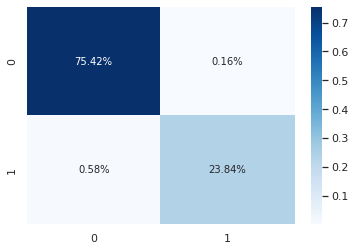

In [43]:
print('BestModel is:',  classification.best_model(type='name'))
print('Accuracy of model:',classification.best_model_accuracy())
print('Training Runtime in seconds',classification.best_model_runtime())
print('Classification Matrix:\n')
print(classification.best_model_clmatrix())
print('Confusion Matrix:\n')
sns.heatmap(classification.confusion_matrix()/np.sum(classification.confusion_matrix()),
            annot=True,
            cmap='Blues',
           fmt='.2%')